# World War 2 Mean Temperature Prediction

## Data preprocessing

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('weather-data.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2808\3088937370.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weather-data.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing less important features

In [175]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [176]:
df.isna().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [177]:
# Removing features that are mostly null

df.drop(['SND','FT','FB','FTI','ITH','PGT','TSHDSBRSGF','SD3','RHX','RHN','RVG','WTE','WindGustSpd', 'DR', 'SPD', 'PoorWeather', 'STA', 'Date'], axis=1, inplace=True)
df.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0
2,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0
3,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0
4,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  object 
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117877 non-null  object 
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  object 
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 11.8+ MB


In [179]:
df.describe()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000
mean,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082
min,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  object 
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117877 non-null  object 
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  object 
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 11.8+ MB


### Feature engineering - Fixing data types

In [181]:
df['Precip'] = df['Precip'].replace('T', 0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  float64
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117877 non-null  object 
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  object 
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 11.8+ MB


In [182]:
df['PRCP'] = df['PRCP'].replace('T', 0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  float64
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117877 non-null  object 
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  float64
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  object 
dtypes: float64(8), int64(3), object(2)
memory usage: 11.8+ MB


In [183]:
df.Snowfall.unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [184]:
df['Snowfall'] = df['Snowfall'].replace('#VALUE!', np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  float64
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117833 non-null  float64
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  float64
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 11.8+ MB


In [185]:
df['SNF'].unique()

array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
       '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1',
       '2.3', '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2',
       '1.4', '3.1', '1.6', '3.4', '3.3', '2.7', 'T', 0.4, 0.3, 0.6, 0.1,
       0.2, 0.5], dtype=object)

In [186]:
df['SNF'] = df['SNF'].replace('T', 0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Precip    119040 non-null  float64
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   Snowfall  117833 non-null  float64
 5   YR        119040 non-null  int64  
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  float64
 9   MAX       118566 non-null  float64
 10  MIN       118572 non-null  float64
 11  MEA       118542 non-null  float64
 12  SNF       117877 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 11.8 MB


### Handling NULL Values

In [187]:
df.isna().sum()

Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1207
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [188]:
threshold = 0.05*len(df)
threshold

5952.0

In [189]:
df1 = df.dropna() # Dropping null values because there are less then 5% null values.

In [190]:
df1.isna().sum()

Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

### Handling Outliers

In [191]:
df1.describe()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
count,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000,115653.000000
mean,3.290217,27.499652,18.150536,22.828216,0.248898,43.820887,6.735433,15.790900,0.129536,81.499373,64.670964,73.090789,0.009799
std,10.922429,7.937198,7.810362,7.604855,2.646866,1.125348,3.416384,8.796123,0.430017,14.286957,14.058652,13.688740,0.104207
min,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,0.000000,-28.000000,-37.000000,-32.000000,0.000000
25%,0.000000,25.555556,15.555556,21.111111,0.000000,43.000000,4.000000,8.000000,0.000000,78.000000,60.000000,70.000000,0.000000
50%,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,0.000000,85.000000,70.000000,78.000000,0.000000
75%,1.016000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,0.040000,89.000000,74.000000,81.000000,0.000000
max,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,12.100000,122.000000,94.000000,104.000000,3.400000


<Axes: xlabel='Snowfall', ylabel='Count'>

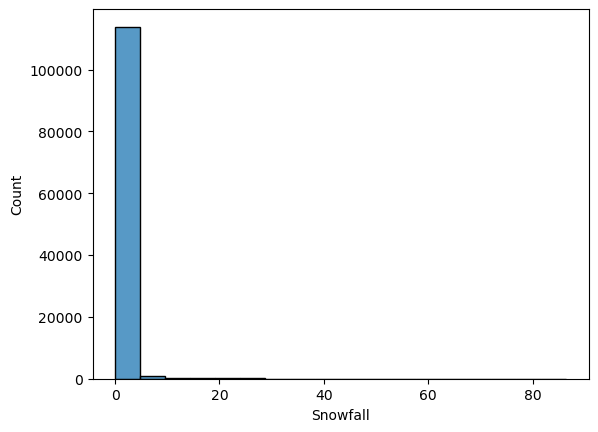

In [192]:
sns.histplot(data=df1, x='Snowfall')

In [193]:
# Dropping these columns because removing their outliers cost more.
df1.drop(['SNF', 'Snowfall', 'Precip', 'PRCP'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2808\4023455783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['SNF', 'Snowfall', 'Precip', 'PRCP'], axis=1, inplace=True)


In [194]:
df1.head()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0


### Remove outliers

In [195]:
# A function to remove the outliers for any column
def remove_outliers_iqr(df):
    """
    Removes outliers from all numeric columns of the DataFrame
    using the IQR (Interquartile Range) method.
    """
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean


In [196]:
df2 = remove_outliers_iqr(df1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82772 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MaxTemp   82772 non-null  float64
 1   MinTemp   82772 non-null  float64
 2   MeanTemp  82772 non-null  float64
 3   YR        82772 non-null  int64  
 4   MO        82772 non-null  int64  
 5   DA        82772 non-null  int64  
 6   MAX       82772 non-null  float64
 7   MIN       82772 non-null  float64
 8   MEA       82772 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 6.3 MB


In [197]:
df2.head()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0


In [198]:
df2.describe()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,82772.000000,82772.000000,82772.000000,82772.000000,82772.000000,82772.000000,82772.000000,82772.000000,82772.000000
mean,30.222707,21.518777,25.875289,43.755642,6.855301,15.774924,86.400872,70.733799,78.575521
std,2.557924,2.919418,2.162213,1.172395,3.271924,8.780768,4.604262,5.254953,3.891984
min,23.333333,12.222222,20.555556,40.000000,1.000000,1.000000,74.000000,54.000000,69.000000
25%,28.888889,20.000000,24.444444,43.000000,4.000000,8.000000,84.000000,68.000000,76.000000
50%,30.000000,22.222222,26.111111,44.000000,7.000000,16.000000,86.000000,72.000000,79.000000
75%,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,36.666667,30.000000,31.111111,45.000000,12.000000,31.000000,98.000000,86.000000,88.000000


In [199]:
# Dropping some features because they can be directly influence target
x = df2.drop(['MeanTemp', 'MaxTemp', 'MinTemp','MEA'], axis=1)
y = df2['MeanTemp']

### Scaling Data

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Selecting Model

In [201]:
# A function to find the best regression model for any given dataset
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [202]:
find_best_model_using_gridsearchcv(x_scaled, y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    vali

,model,best_score,best_params
0,linear_regression,0.989012,{}
1,lasso,-0.000054,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.991404,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Splitting train test data

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

### Training and Testing Model

In [204]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [205]:
model.score(x_test, y_test)

0.9880598213052199